## Fitting Classification Trees

In [1]:
#import tree package for classification and regression trees
install.packages('tree')
library(tree)
library(ISLR)

Installing package into 'C:/Users/Watson Turbo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Watson Turbo\AppData\Local\Temp\RtmpcVXXcI\downloaded_packages


Warning message:
"package 'tree' was built under R version 3.6.1"Warning message:
"package 'ISLR' was built under R version 3.6.1"

In [5]:
#Pull Carseats data
attach(Carseats)
#Create high variable if sales exceeds 8 then "yes"
High=ifelse(Sales<=8,"No","Yes")

In [6]:
#data.frame() to merge High with Carseats
Carseats=data.frame(Carseats,High)

In [7]:
#fit classification tree to predict High
#this uses all variables accept for Sales
tree.carseats=tree(High~.-Sales,Carseats)

In [8]:
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

<b>Training Error Rate is 9%

In [9]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4.15,141,64,3,340,128,Bad,38,13,Yes,No,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes,Yes


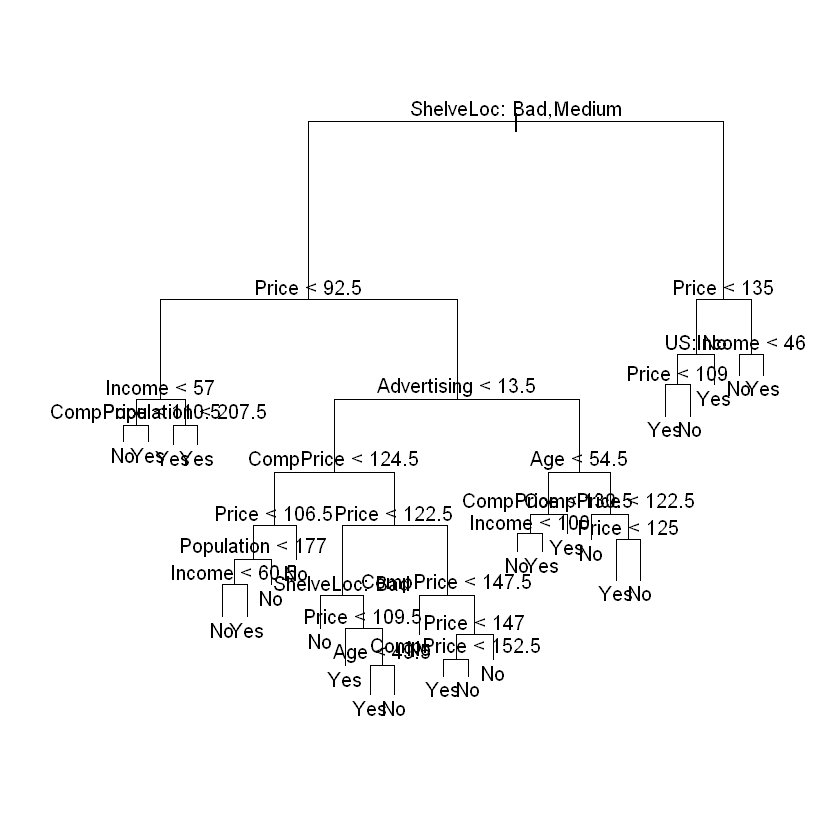

In [10]:
plot(tree.carseats)
#text function to display node labels
text(tree.carseats,pretty=0)

<b>According to the Tree, Shelve Location is the most important indicator of sales. 

In [11]:
#To dispaly split criterion
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

## Evaluating the test error

In [16]:
#Split observations into training and test set
#build tree on training set
#evaluate performance on test set
#type="class" returns actual class prediction
set.seed(2)
train=sample(1:nrow(Carseats), 200)
Carseats.test=Carseats[-train,]
High.test=High[-train]
tree.carseats=tree(High~.-Sales,Carseats,subset=train)
tree.pred=predict(tree.carseats,Carseats.test,type="class")
table(tree.pred,High.test)

         High.test
tree.pred  No Yes
      No  104  33
      Yes  13  50

In [19]:
#Calculate Correct Predictions on test data
(104+50)/200

[1] 0.77

## Prune tree to improve results

In [21]:
#cv.tree() to perform cross-val to determine optimal level
#also reports number of terminal nodes
set.seed(3)
#FUN=prune.misclass indicates classification error rate
#rather than default for cv.tree()
cv.carseats =cv.tree(tree.carseats,FUN=prune.misclass)
names(cv.carseats)
cv.carseats

[1] "size"   "dev"    "k"      "method"

$size
[1] 21 19 14  9  8  5  3  2  1

$dev
[1] 74 76 81 81 75 77 78 85 81

$k
[1] -Inf  0.0  1.0  1.4  2.0  3.0  4.0  9.0 18.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

<b>Note: dev corresponds to cross-val error rate in this instance

Tree with 9 terminal nodes results in lowest cross-val with 50 cross val errors

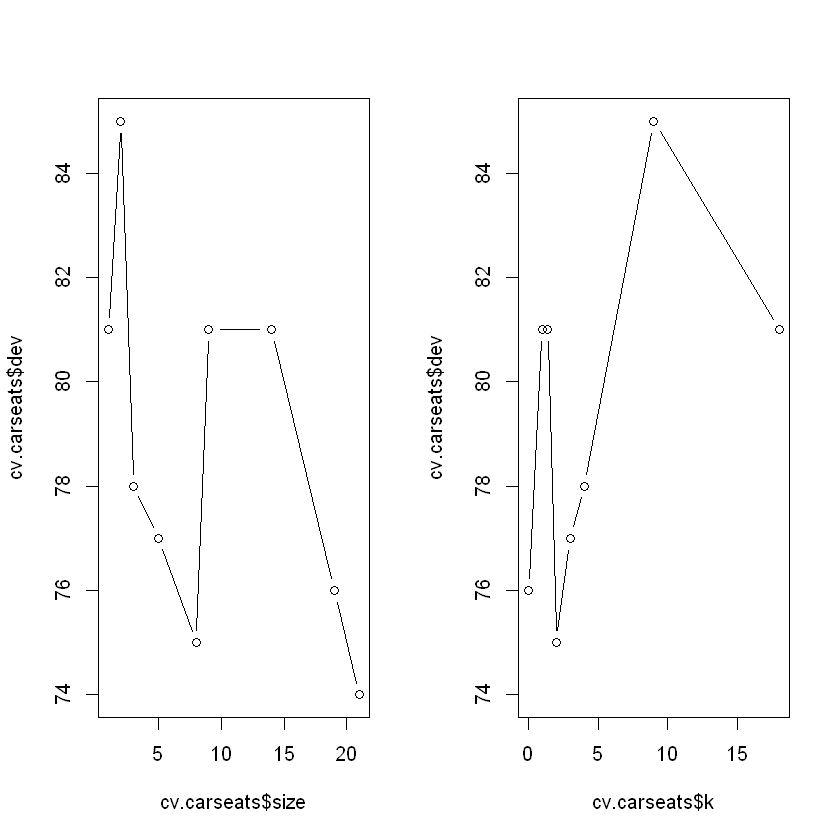

In [23]:
par(mfrow=c(1,2))
plot(cv.carseats$size,cv.carseats$dev,type="b")
plot(cv.carseats$k,cv.carseats$dev,type="b")

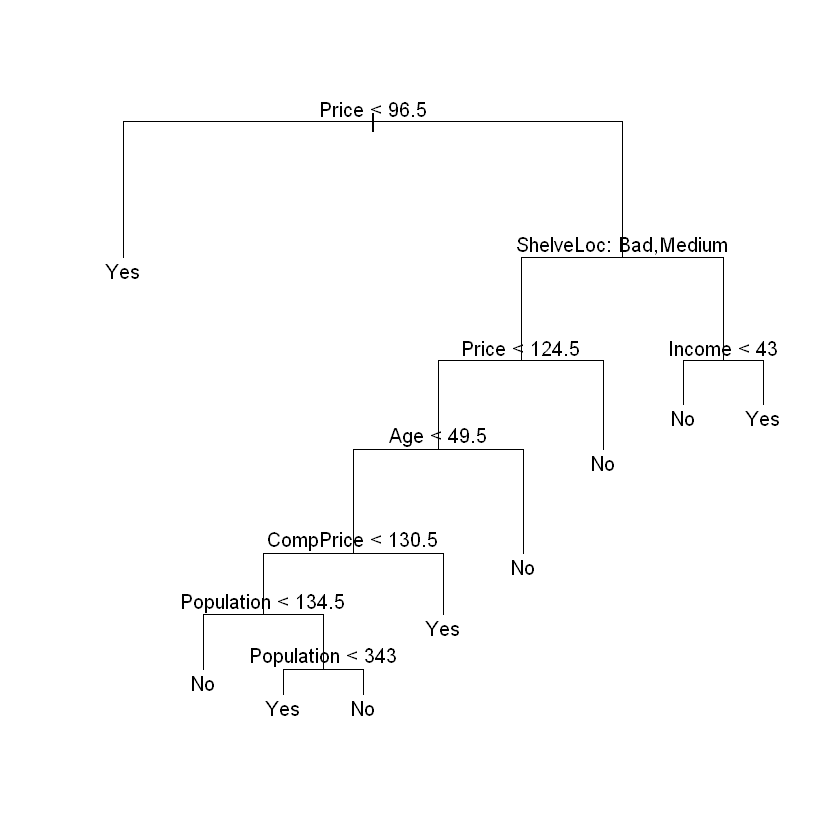

In [24]:
#prune tree with prune.misclass()
prune.carseats=prune.misclass(tree.carseats,best=9)
plot(prune.carseats)
text(prune.carseats,pretty=0)

In [27]:
#Determine how well the Pruned tree performs on Test set
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)

         High.test
tree.pred No Yes
      No  97  25
      Yes 20  58

In [28]:
(97+58)/200

[1] 0.775

<b>Test Observations are correctly classified 77.5% compared to unpruned at 77%

         High.test
tree.pred  No Yes
      No  102  30
      Yes  15  53

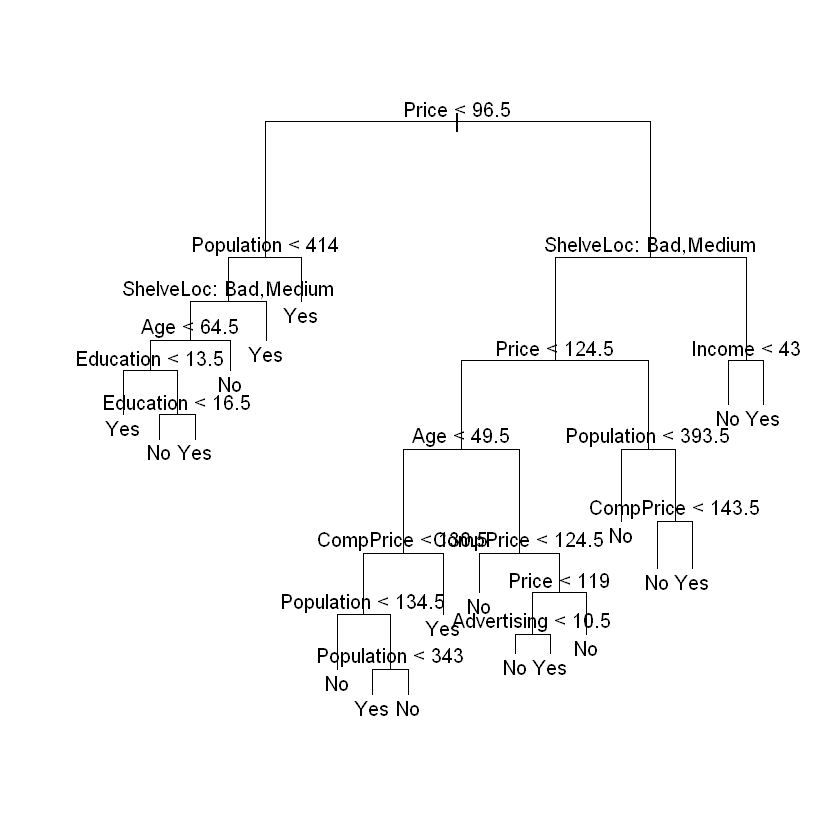

In [29]:
#Increase the value of "best" to obtain a larger pruned tree
#However, this has lower classification acrruracy
prune.carseats=prune.misclass(tree.carseats,best=15)
plot(prune.carseats)
text(prune.carseats,pretty=0)
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)

In [30]:
(102+53)/200

[1] 0.775

<b>Still predicting 77.5%, contrary to the ISLR Lab

## Fitting Regression Trees

In [31]:
# Fit Regression Tree on Boston dataset
library(MASS)
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston=tree(medv~.,Boston,subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

<b>Walkthrough says 3 variables were used in constructing the tree, however ours says 4

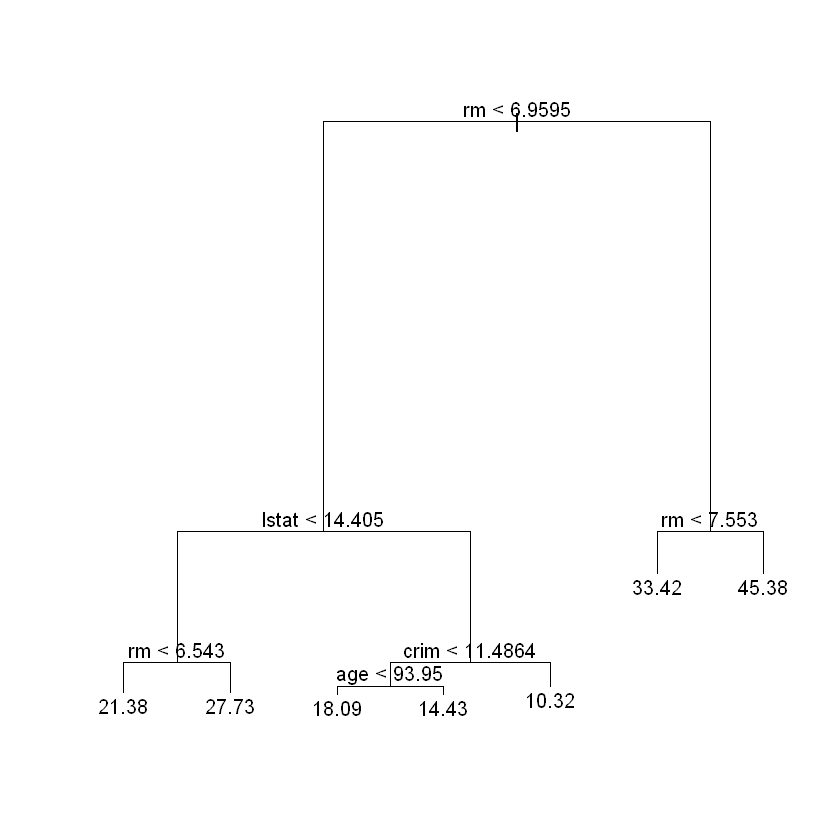

In [32]:
plot(tree.boston)
text(tree.boston,pretty=0)

<b>lstat=lower socioeconomic status
    
Tree indicates lower values of lstat corresponds to more expensive houses

<i>Lab Notes:
Tree predicts $46,400 for larger homes in suburbs
rm>=7.437 and lstat<9.715

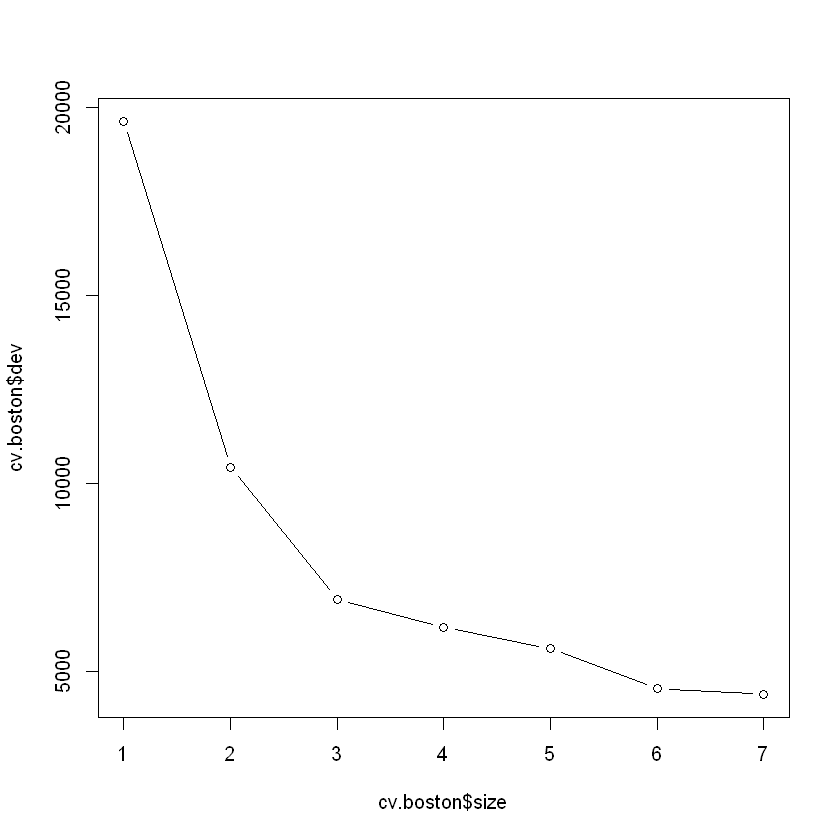

In [33]:
#prune tree with cross val
cv.boston=cv.tree(tree.boston)
plot(cv.boston$size,cv.boston$dev,type='b')

<b>Chart indicates unpruned tree of 7 layers is best

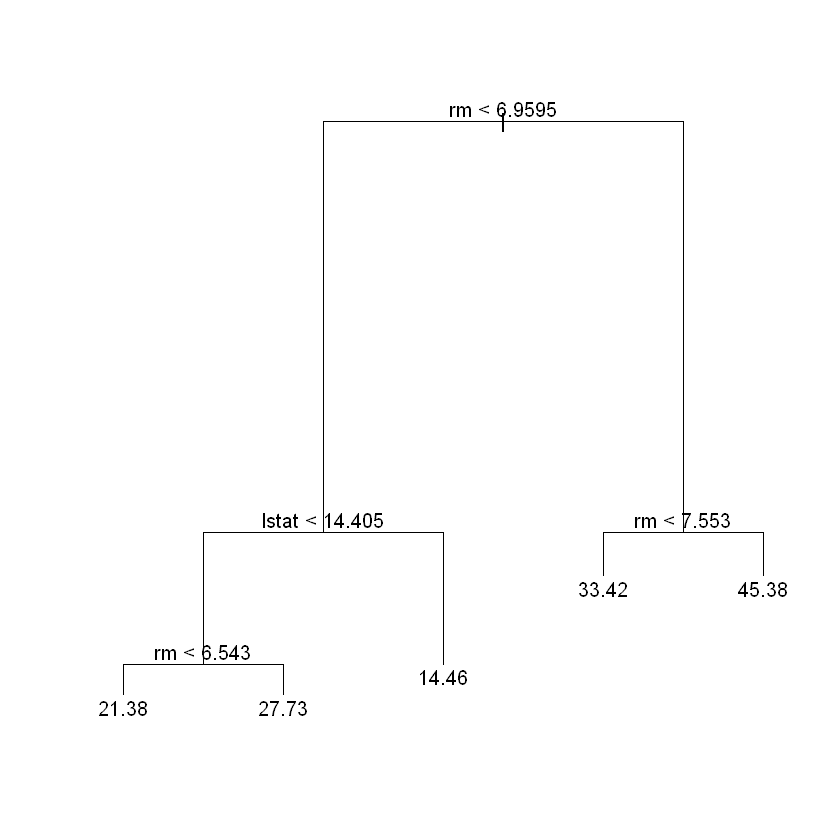

In [35]:
#plot pruned tree 5
prune.boston=prune.tree(tree.boston,best=5)
plot(prune.boston)
text(prune.boston,pretty=0)

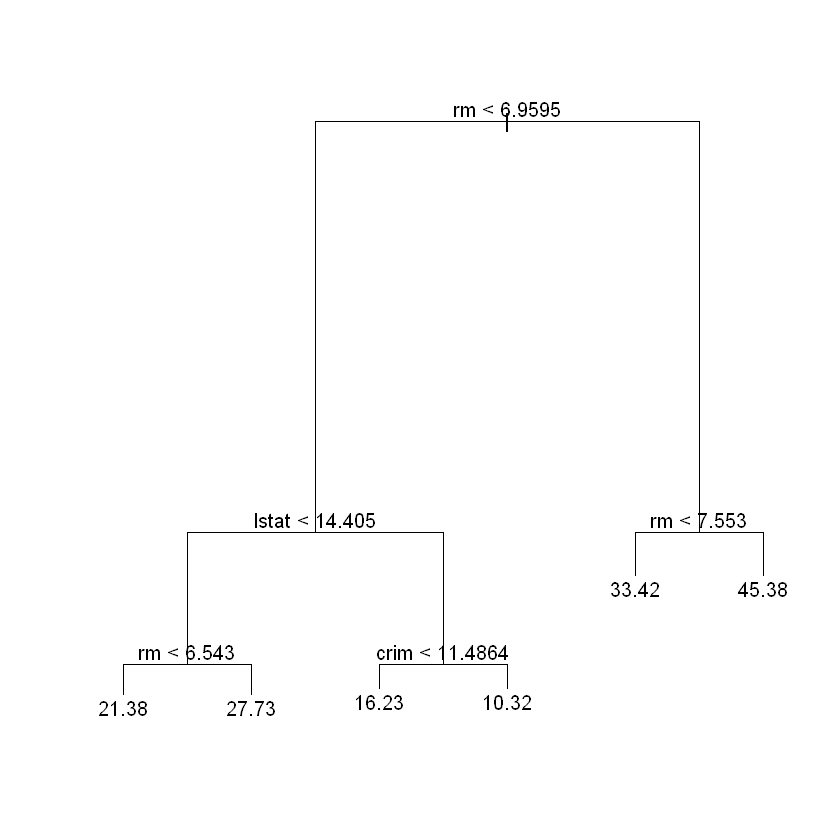

In [39]:
#best=6
prune.boston=prune.tree(tree.boston,best=6)
plot(prune.boston)
text(prune.boston,pretty=0)

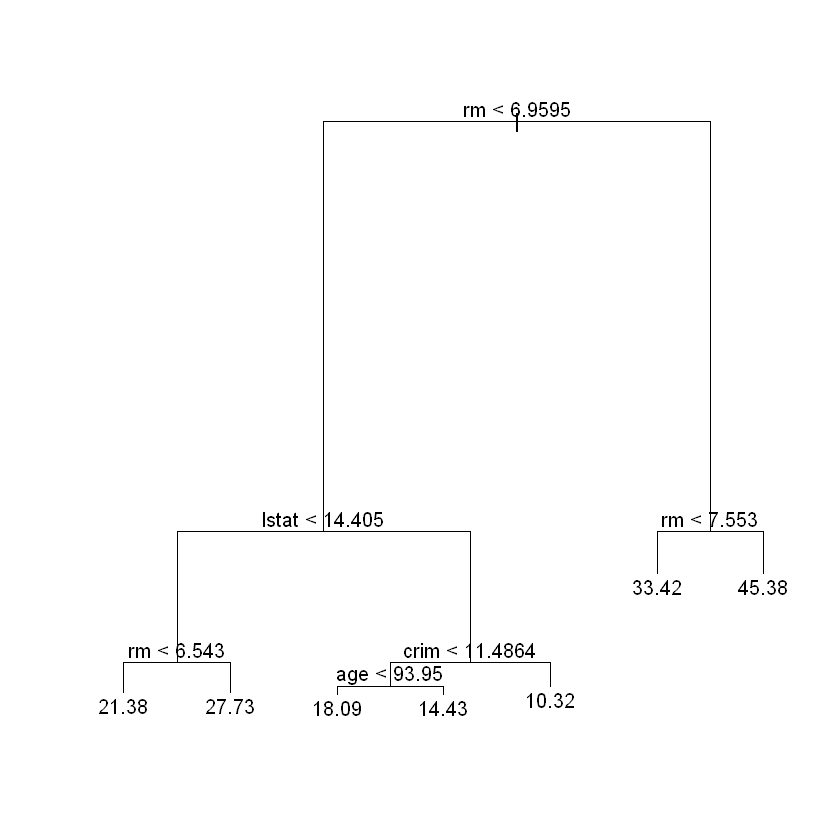

In [37]:
#Note: best=7 returns unpruned tree
prune.boston=prune.tree(tree.boston,best=7)
plot(prune.boston)
text(prune.boston,pretty=0)

[1] 35.28688

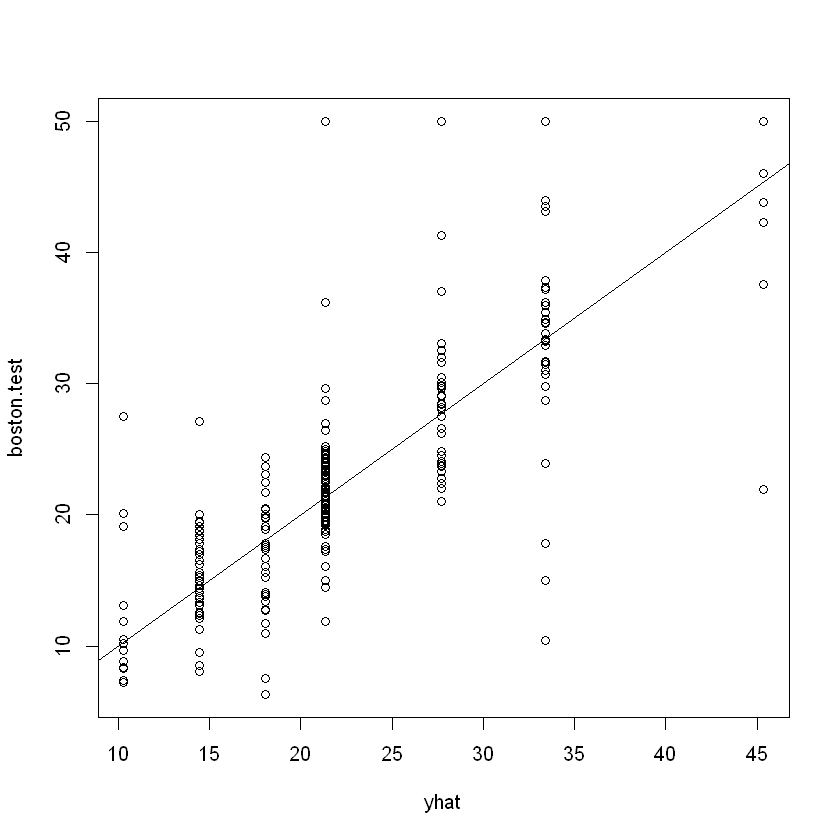

In [40]:
#use unpruned tree to make predictions on Test set
yhat=predict(tree.boston,newdata=Boston[-train,])
boston.test=Boston[-train,"medv"]
plot(yhat,boston.test)
abline(0,1)
mean((yhat-boston.test)^2)

<b>MSE associated with Regression Tree = 35.28

In [41]:
sqrt(35.28)

[1] 5.939697

<b>This model leads to test predictions around $5,939 of true median home value for the suburb

## Bagging and Random Forests

In [43]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [45]:
#Note: Bagging is a special case of random forest m=p
set.seed(1)
bag.boston=randomForest(medv~.,data=Boston,subset=train,
                       mtry=13,importance=TRUE)
bag.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.39601
                    % Var explained: 85.17

[1] 23.59273

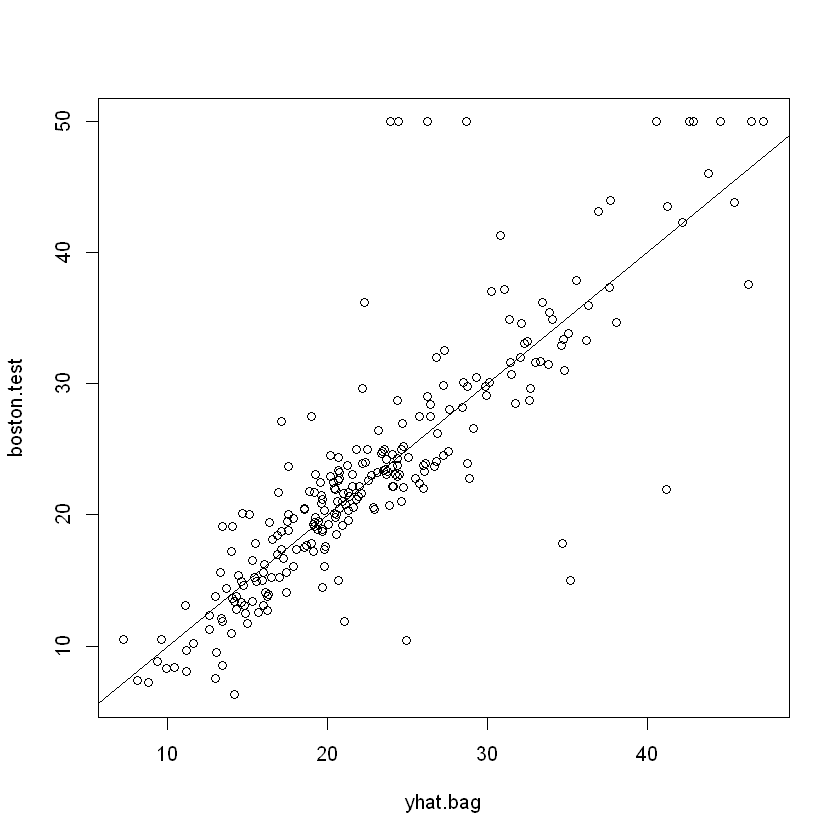

In [47]:
#mtry=13 indicates 13 predictors considered for each split of tree
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
plot(yhat.bag, boston.test)
abline(0,1)
mean((yhat.bag-boston.test)^2)

<b>Bagging Test set MSE = 23.59

In [50]:
#Try 25 Trees
#use ntree to change # of trees in randomForest()
bag.boston=randomForest(medv~.,data=Boston,subset=train,
                       mtry=13,ntree=25)
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
mean((yhat.bag-boston.test)^2)

[1] 23.66716

<b>MSE = 23.68 which is slightly higher

In [51]:
#mtry=6 
set.seed(1)
rf.boston=randomForest(medv~.,data=Boston,subset=train,
                      mtry=6,importance=TRUE)
yhat.rf = predict(rf.boston,newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)

[1] 19.62021

<b>Test Set MSE = 19.62 
    
This Random Forest yielded an improvement over bagging

In [52]:
#View importance of each variable
importance(rf.boston)

,%IncMSE,IncNodePurity
crim,16.697017,1076.08786
zn,3.625784,88.35342
indus,4.968621,609.53356
chas,1.061432,52.21793
nox,13.518179,709.87339
rm,32.343305,7857.65451
age,13.272498,612.21424
dis,9.032477,714.94674
rad,2.878434,95.80598
tax,9.118801,364.92479


%IncMSE = Based on mean decrase of accuracy in predictions on out of bag samples when VARIABLE is excluded from model

IncNodePurity = Measures total decrase in node impurity from splits over variable, AVG over all trees

-Node impurity in Regression Trees is measured by training RSS

-Node Impurity in Classification trees is measured by Deviance

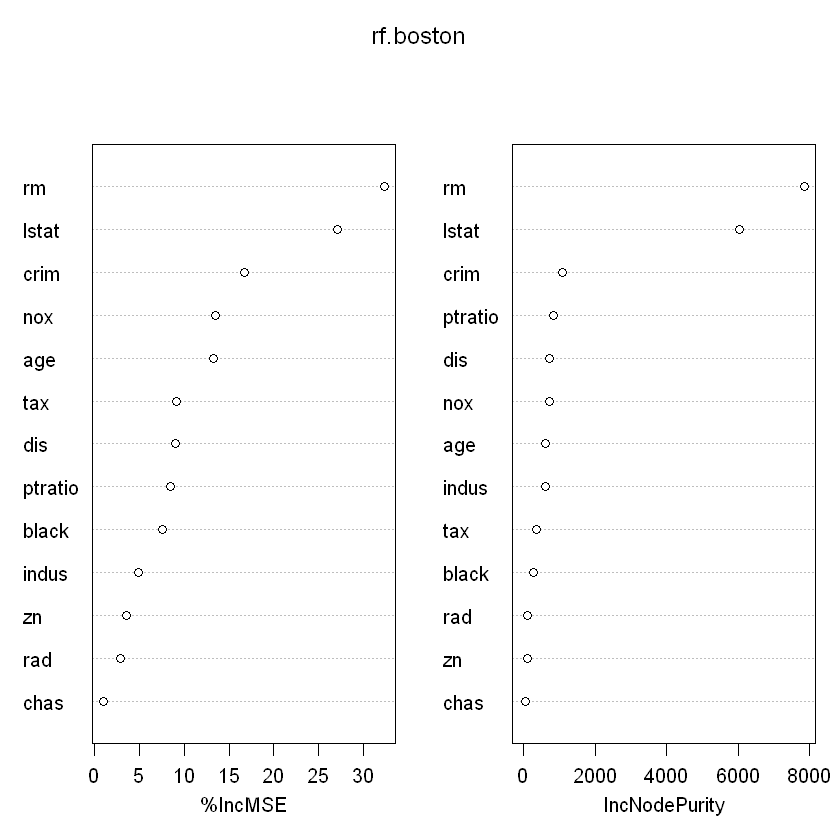

In [53]:
#Plot importance measures
varImpPlot(rf.boston)

## Boosting

In [57]:
#install gbm package to fit boosted regression trees
install.packages('gbm')

Installing package into 'C:/Users/Watson Turbo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependency 'gridExtra'



package 'gridExtra' successfully unpacked and MD5 sums checked
package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Watson Turbo\AppData\Local\Temp\RtmpcVXXcI\downloaded_packages


In [58]:
library(gbm)
set.seed(1)
#use distribution="gaussian" for regression problem
#if binary problem use "bernoulli"
#depth of trees=4
#5000 trees
boost.boston=gbm(medv~.,data=Boston[train,],distribution=
                "gaussian",n.trees=5000,interaction.depth=4)

Warning message:
"package 'gbm' was built under R version 3.6.1"Loaded gbm 2.1.5


,var,rel.inf
rm,rm,43.9919329
lstat,lstat,33.1216941
crim,crim,4.2604167
dis,dis,4.0111090
nox,nox,3.4353017
black,black,2.8267554
age,age,2.6113938
ptratio,ptratio,2.5403035
tax,tax,1.4565654
indus,indus,0.8008740


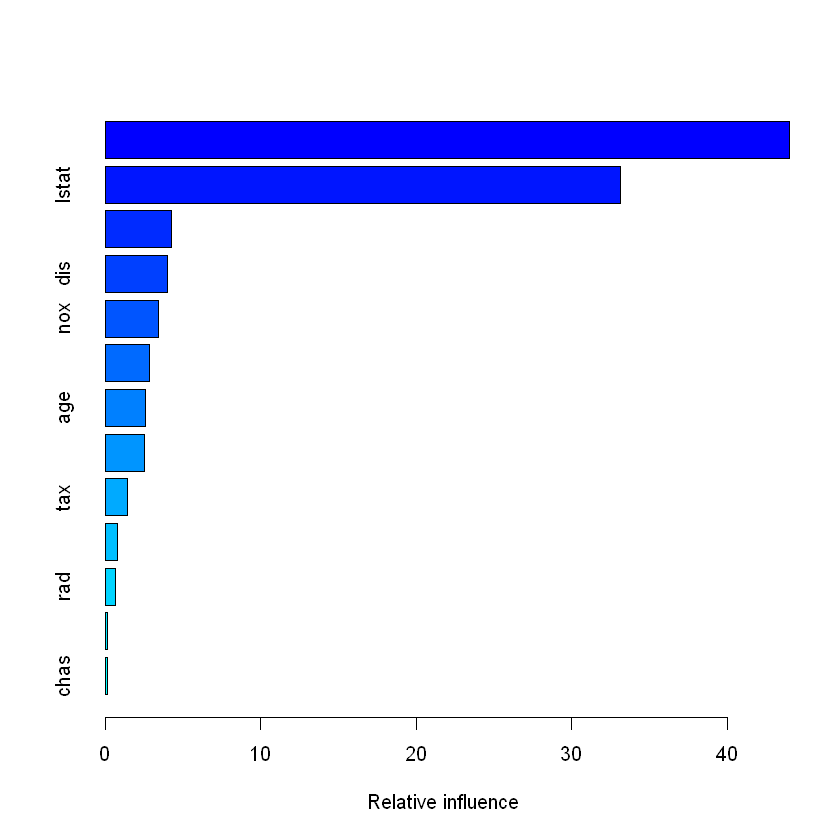

In [60]:
summary(boost.boston)

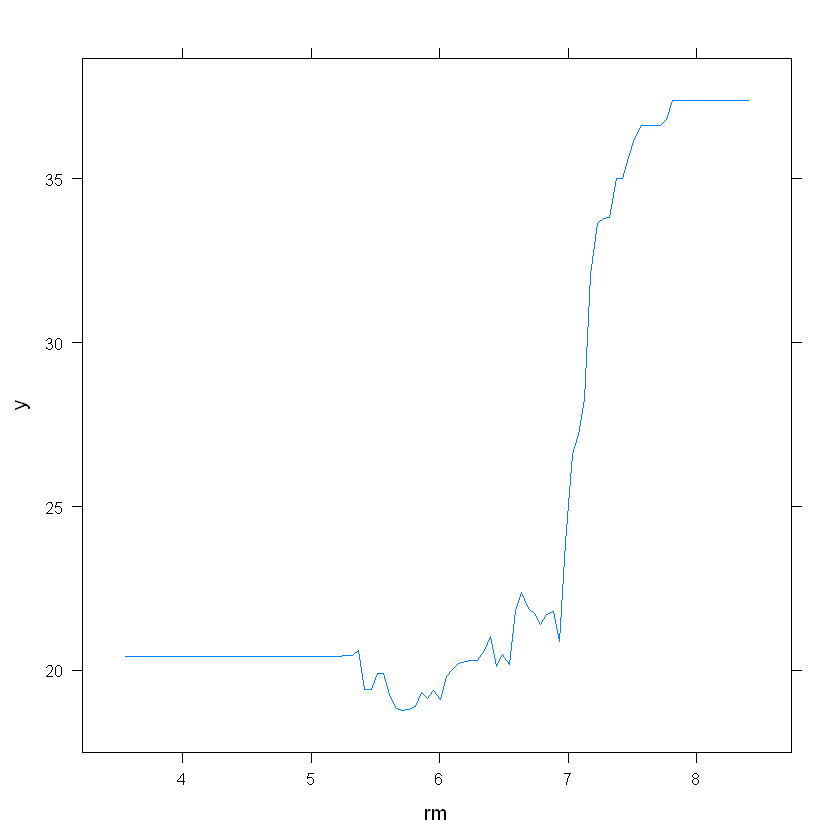

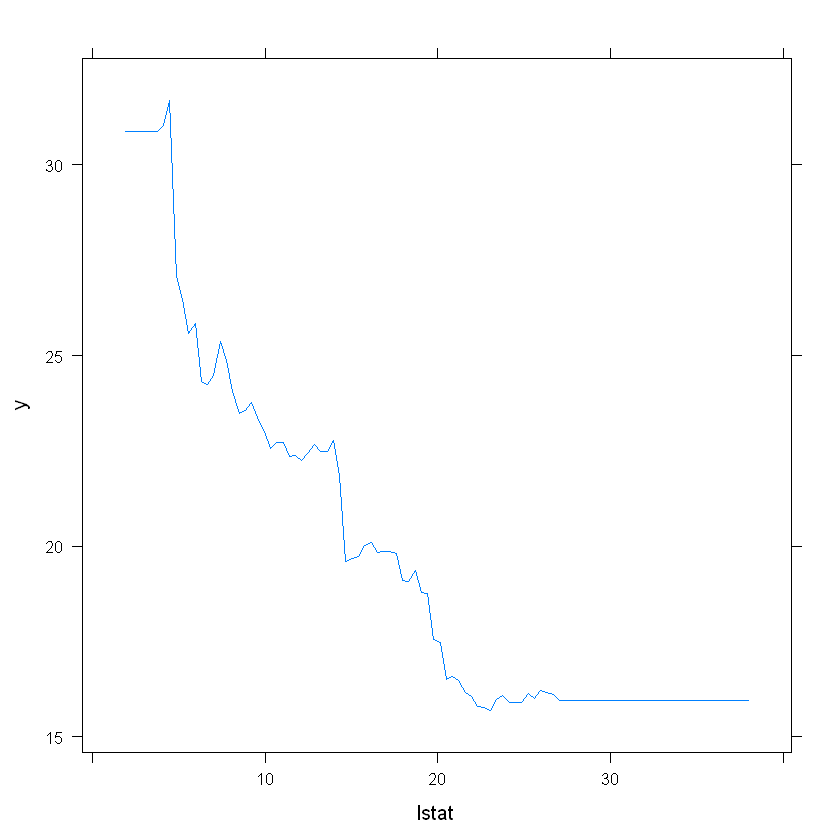

In [61]:
#Produce partial dependence plots for two variables
par(mfrow=c(1,2))
plot(boost.boston,i="rm")
plot(boost.boston,i="lstat")

<b>Median Housing prices are increasing with "rm" and decreasing with "lstat"

In [63]:
#predict medv on test set
yhat.boost=predict(boost.boston,newdata=Boston[-train,],
                  n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 18.84709

<b>Test MSE from Boosting = 18.84

Recall:

Random Forest = 19.62

Bagging = 23.59

<b>Adjust Shrinkage Parameter Lambda

In [68]:
#Note: Default shrinkage parameter = 0.001
boost.boston=gbm(medv∼.,data=Boston[train,],distribution=
                 "gaussian",n.trees=5000,interaction.depth=4,shrinkage=0.2,
                 verbose=F)
yhat.boost=predict(boost.boston,newdata =Boston[-train,],
               n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 17.05885

<b>MSE = 17.05 with adjustring shrinkage parameter